
# **Social Networks Homework 4**
# **Amirhossein Farazmand**
# **810104221**

---

# **Question 4**

OPERATION: CHAIN BREAKER STARTED...
Target Network: Zachary's Karate Club | Nodes: 34 | Edges: 78
✓ Operation Execution Complete!
INTELLIGENCE REPORT
Total edges removed to break network: 78
Maximum Modularity achieved: 0.4013
Optimal step (where modularity peaked): 24
Critical Edge (first edge to split network): (2, 13)
Detected community sizes: [15, 19]
Accuracy vs Ground Truth Intelligence: 94.12%

Generating visual intelligence report...


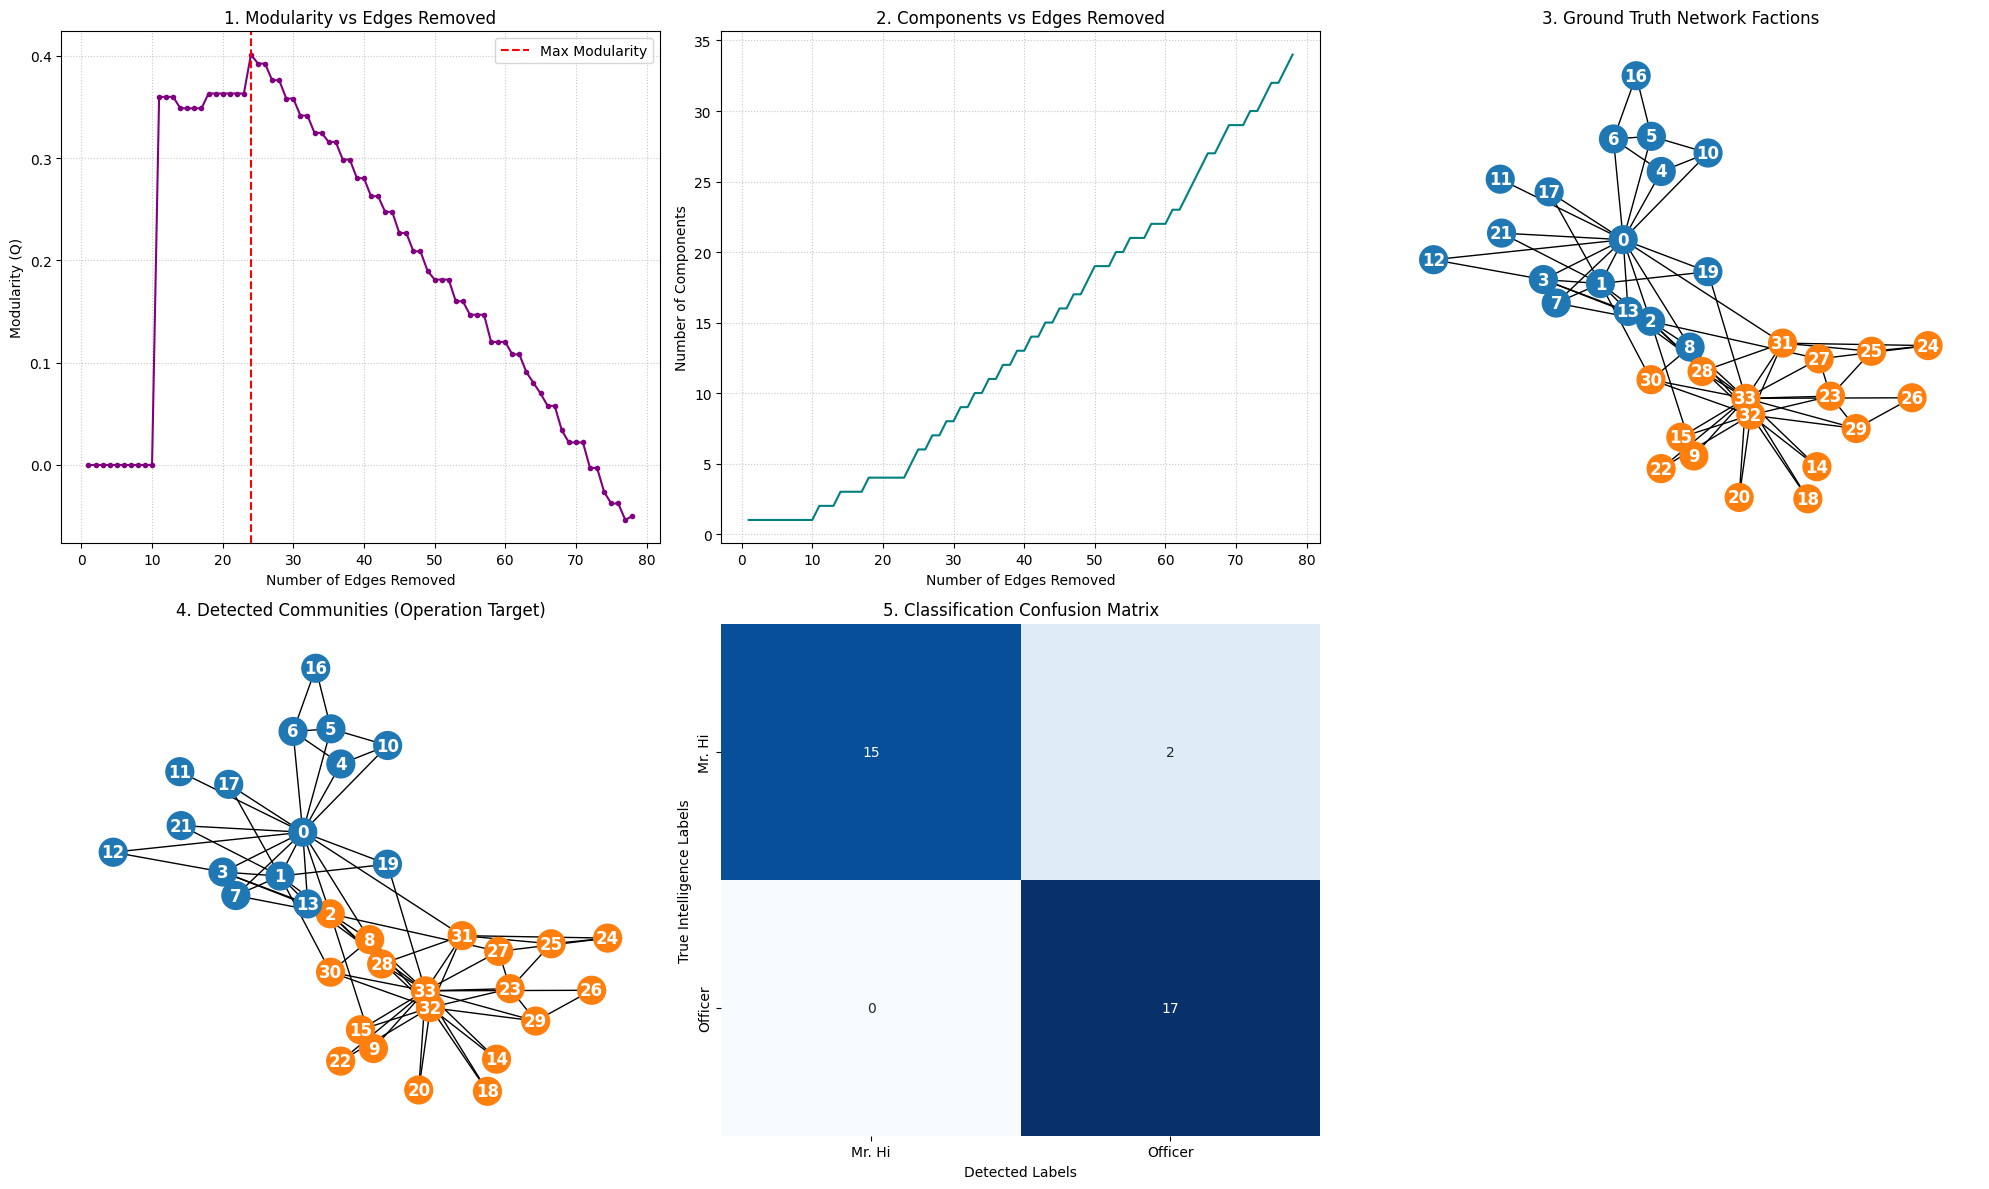

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import os

from q4_girvan_newman import *

# Create figures directory if it doesn't exist
os.makedirs('figures', exist_ok=True)


# Load Zachary's Karate Club network
G = nx.karate_club_graph()

# Extract ground truth labels for later comparison
true_labels = {node: G.nodes[node]['club'] for node in G.nodes()}

print("=" * 50)
print("OPERATION: CHAIN BREAKER STARTED...")
print(f"Target Network: Zachary's Karate Club | Nodes: {G.number_of_nodes()} | Edges: {G.number_of_edges()}")
print("=" * 50)

# Execute Girvan-Newman algorithm
results = girvan_newman_analysis(G, target_communities=2)

print("✓ Operation Execution Complete!")

# Display textual results
print("=" * 40)
print("INTELLIGENCE REPORT")
print("=" * 40)
print(f"Total edges removed to break network: {len(results['removed_edges'])}")
print(f"Maximum Modularity achieved: {results['max_modularity']:.4f}")
print(f"Optimal step (where modularity peaked): {results['optimal_step']}")
print(f"Critical Edge (first edge to split network): {results['critical_edge']}")
print(f"Detected community sizes: {[len(c) for c in results['final_communities']]}")

# Calculate and display accuracy
accuracy = calculate_accuracy(results['final_communities'], true_labels)
print(f"Accuracy vs Ground Truth Intelligence: {accuracy:.2%}")

# Generate and display visualizations
print("\nGenerating visual intelligence report...")
visualize_results(G, results, true_labels)

<div dir="rtl" align="justify">

### گزارش عملیات Chain Breaker: تحلیل الگوریتم Girvan-Newman
**هدف:** شناسایی گروه‌های پنهان در شبکه ارتباطی با استفاده از شاخص Edge Betweenness Centrality و ارزیابی کیفیت ساختار با معیار Modularity.

#### Intelligence Analysis 

**۱. تحلیل پیشرفت Modularity:**
* **نقطه اوج:** بر اساس خروجی‌های به دست آمده و نمودار (Modularity vs Edges Removed)، معیار Modularity در مرحله ۲۴ (پس از حذف ۲۴ یال) به بالاترین مقدار خود یعنی `0.4013` رسیده است.
* **زمان اولین شکست شبکه:** خیر، حداکثر Modularity همزمان با اولین قطعه‌قطعه شدن شبکه به دست نیامده است. با بررسی نمودار اجزای همبند (Components vs Edges Removed)، شبکه برای اولین بار در مرحله ۱۱ به دو جزء مجزا (دو جناح اصلی) تقسیم می‌شود، اما کیفیت این بخش‌بندی (Modularity) در آن مرحله هنوز بهینه نیست. با ادامه حذف یال‌های واسط، ساختار درونی Community ها خالص‌تر شده و Modularity در مرحله ۲۴ به نقطه ماکزیمم می‌رسد.
* **دلیل کاهش Modularity پس از نقطه بهینه:** پس از عبور از مرحله ۲۴، الگوریتم شروع به حذف یال‌های مهم درون‌گروهی (Intra-community edges) می‌کند. این امر باعث شکسته شدن گروه‌های اصلی به زیرگروه‌های کوچک‌تر و در نهایت تولید گره‌های منزوی (Isolated nodes) می‌شود. طبق فرمول Newman، این پراکندگی بیش از حد باعث کاهش شدید انسجام شبکه و در نتیجه افت مقدار Modularity به سمت مقادیر منفی می‌شود.

**۲. تحلیل یال‌های بحرانی (Critical Edge):**
* **یال قطع‌کننده اولیه:** خروجی نشان می‌دهد که یال `(2, 13)` اولین یالی بوده است که حذف آن (در امتداد یال‌های پیشین) منجر به دو پاره شدن شبکه (Fragmentation) شده است.
* **ویژگی‌های ساختاری یال:** این یال پیش از حذف، دارای بالاترین نمره Edge Betweenness Centrality در میان یال‌های باقیمانده بوده است. این یعنی بخش عظیمی از کوتاه‌ترین مسیرهای (Shortest paths) ارتباطی میان اعضای دو جناح مختلف شبکه از این یال عبور می‌کرده و نقش یک پل محلی (Local Bridge) کلیدی را ایفا می‌کرده است.
* **تطبیق با واقعیت:** بله، با توجه به ساختار Ground Truth، این یال عملاً یکی از شریان‌های ارتباطی اصلی میان دو هسته مرکزی شبکه بوده است که با فروپاشی آن، جریان اطلاعات میان دو جناح به طور کامل قطع شد.

**۳. ارزیابی با Ground Truth:**
* **دقت دسته‌بندی:** الگوریتم توانست با دقت بسیار بالای `94.12%` اعضای جناح‌ها را به درستی تشخیص دهد.
* **گره‌های دارای خطای تشخیص (Misclassified):** با بررسی ماتریس درهم‌ریختگی (Confusion Matrix) مشخص است که ۲ گره به اشتباه طبقه‌بندی شده‌اند. با مقایسه نگاشت گراف اصلی (نمودار ۳) و گراف تشخیص داده شده (نمودار ۴)، مشخص می‌شود که گره‌های `2` و `8` که در واقعیت متعلق به گروه Mr. Hi (رنگ آبی) هستند، به گروه Officer (رنگ نارنجی) نسبت داده شده‌اند.
* **علت بروز خطا:** این گره‌ها در ساختار شبکه نقش گره‌های مرزی (Boundary nodes) را دارند. از آنجایی که ارتباطات (Ties) آن‌ها با اعضای جناح رقیب پس از حذف شدن یال‌های اصلی با Betweenness بالا، از ارتباطات درون‌گروهی‌شان قوی‌تر باقی مانده بود، الگوریتم بر اساس توپولوژی ثانویه آن‌ها را بخشی از جناح مقابل شناسایی کرد.


####  Strategic Report 

**خلاصه عملیات اجرایی:**
* **تعداد یال‌های حذف شده:** برای قطع کامل ارتباط دو بخش شبکه، در مجموع ۷۸ یال پردازش شد که اولین جدایی در مرحله ۱۱ و تفکیک بهینه در مرحله ۲۴ رخ داد.
* **گلوگاه کشف شده:** کانال ارتباطی بین گره‌های `(2, 13)` به عنوان حیاتی‌ترین شریان ارتباطی و نقطه ضعف ساختاری شبکه جهت اعمال استراتژی فروپاشی شناسایی گردید.

**تحلیل مقیاس‌پذیری (Scalability Analysis):**
* الگوریتم Girvan-Newman دارای پیچیدگی زمانی $O(m^2n)$ است که در آن $m$ تعداد یال‌ها و $n$ تعداد گره‌ها است.
* **کارایی برای شبکه‌های بزرگ:** این الگوریتم برای شبکه‌های اطلاعاتی عظیم (مثلاً با بیش از ۱۰۰۰ گره) کاملاً ناکارآمد و غیرقابل اجرا (Not Viable) است. 
* **گلوگاه محاسباتی:** دلیل این ناکارآمدی، الزام به محاسبه مجدد Edge Betweenness Centrality برای تمامی یال‌های موجود در شبکه پس از هر بار حذف یک یال است. این فرآیند تکرارشونده، بار پردازشی را به صورت نمایی افزایش داده و سرعت اجرای عملیات را متوقف می‌کند.

**توصیه‌های عملیاتی:**
* **نتیجه‌گیری برای استقرار:** با وجود دقت بسیار بالا در کشف ساختارهای پنهان، استقرار این الگوریتم برای سیستم‌های تشخیص سریع (Rapid Detection) به هیچ وجه پیشنهاد نمی‌شود. Trade-off (مصالحه) بین زمان و دقت در اینجا به شدت به ضرر سرعت است.
* **جایگزین‌های پیشنهادی:** برای عملیات‌های واکنش سریع و رویارویی با شبکه‌های کلان، رویکرد باید تغییر کند. الگوریتم **Louvain** به دلیل رویکرد حریصانه در بهینه‌سازی Modularity و یا الگوریتم **Label Propagation** به دلیل پیچیدگی زمانی نزدیک به خطی $O(m+n)$، گزینه‌های استراتژیک به مراتب بهتری برای ماموریت‌های آتی خواهند بود.

</div>

# **Question 5**

OPERATION: RAPID DETECTION
Network: Les Misérables | Nodes: 77 | Edges: 254
Deploying Algorithm 1: Louvain...
Deploying Algorithm 2: Label Propagation...
Deploying Algorithm 3: Greedy Modularity...

--- COMPARISON RESULTS ---


,algorithm,avg_time,std_time,avg_num_communities,avg_modularity,std_modularity,largest_community_size,smallest_community_size
0,Louvain,0.004948,0.004089,6.0,0.565833,0.000465,24.0,6.0
1,Label Propagation,0.006431,0.003255,5.0,0.499544,0.024799,31.2,6.4
2,Greedy Modularity,0.011846,0.003868,5.0,0.547220,0.000000,33.0,6.0


BEST ALGORITHM: Louvain | Modularity: 0.5658


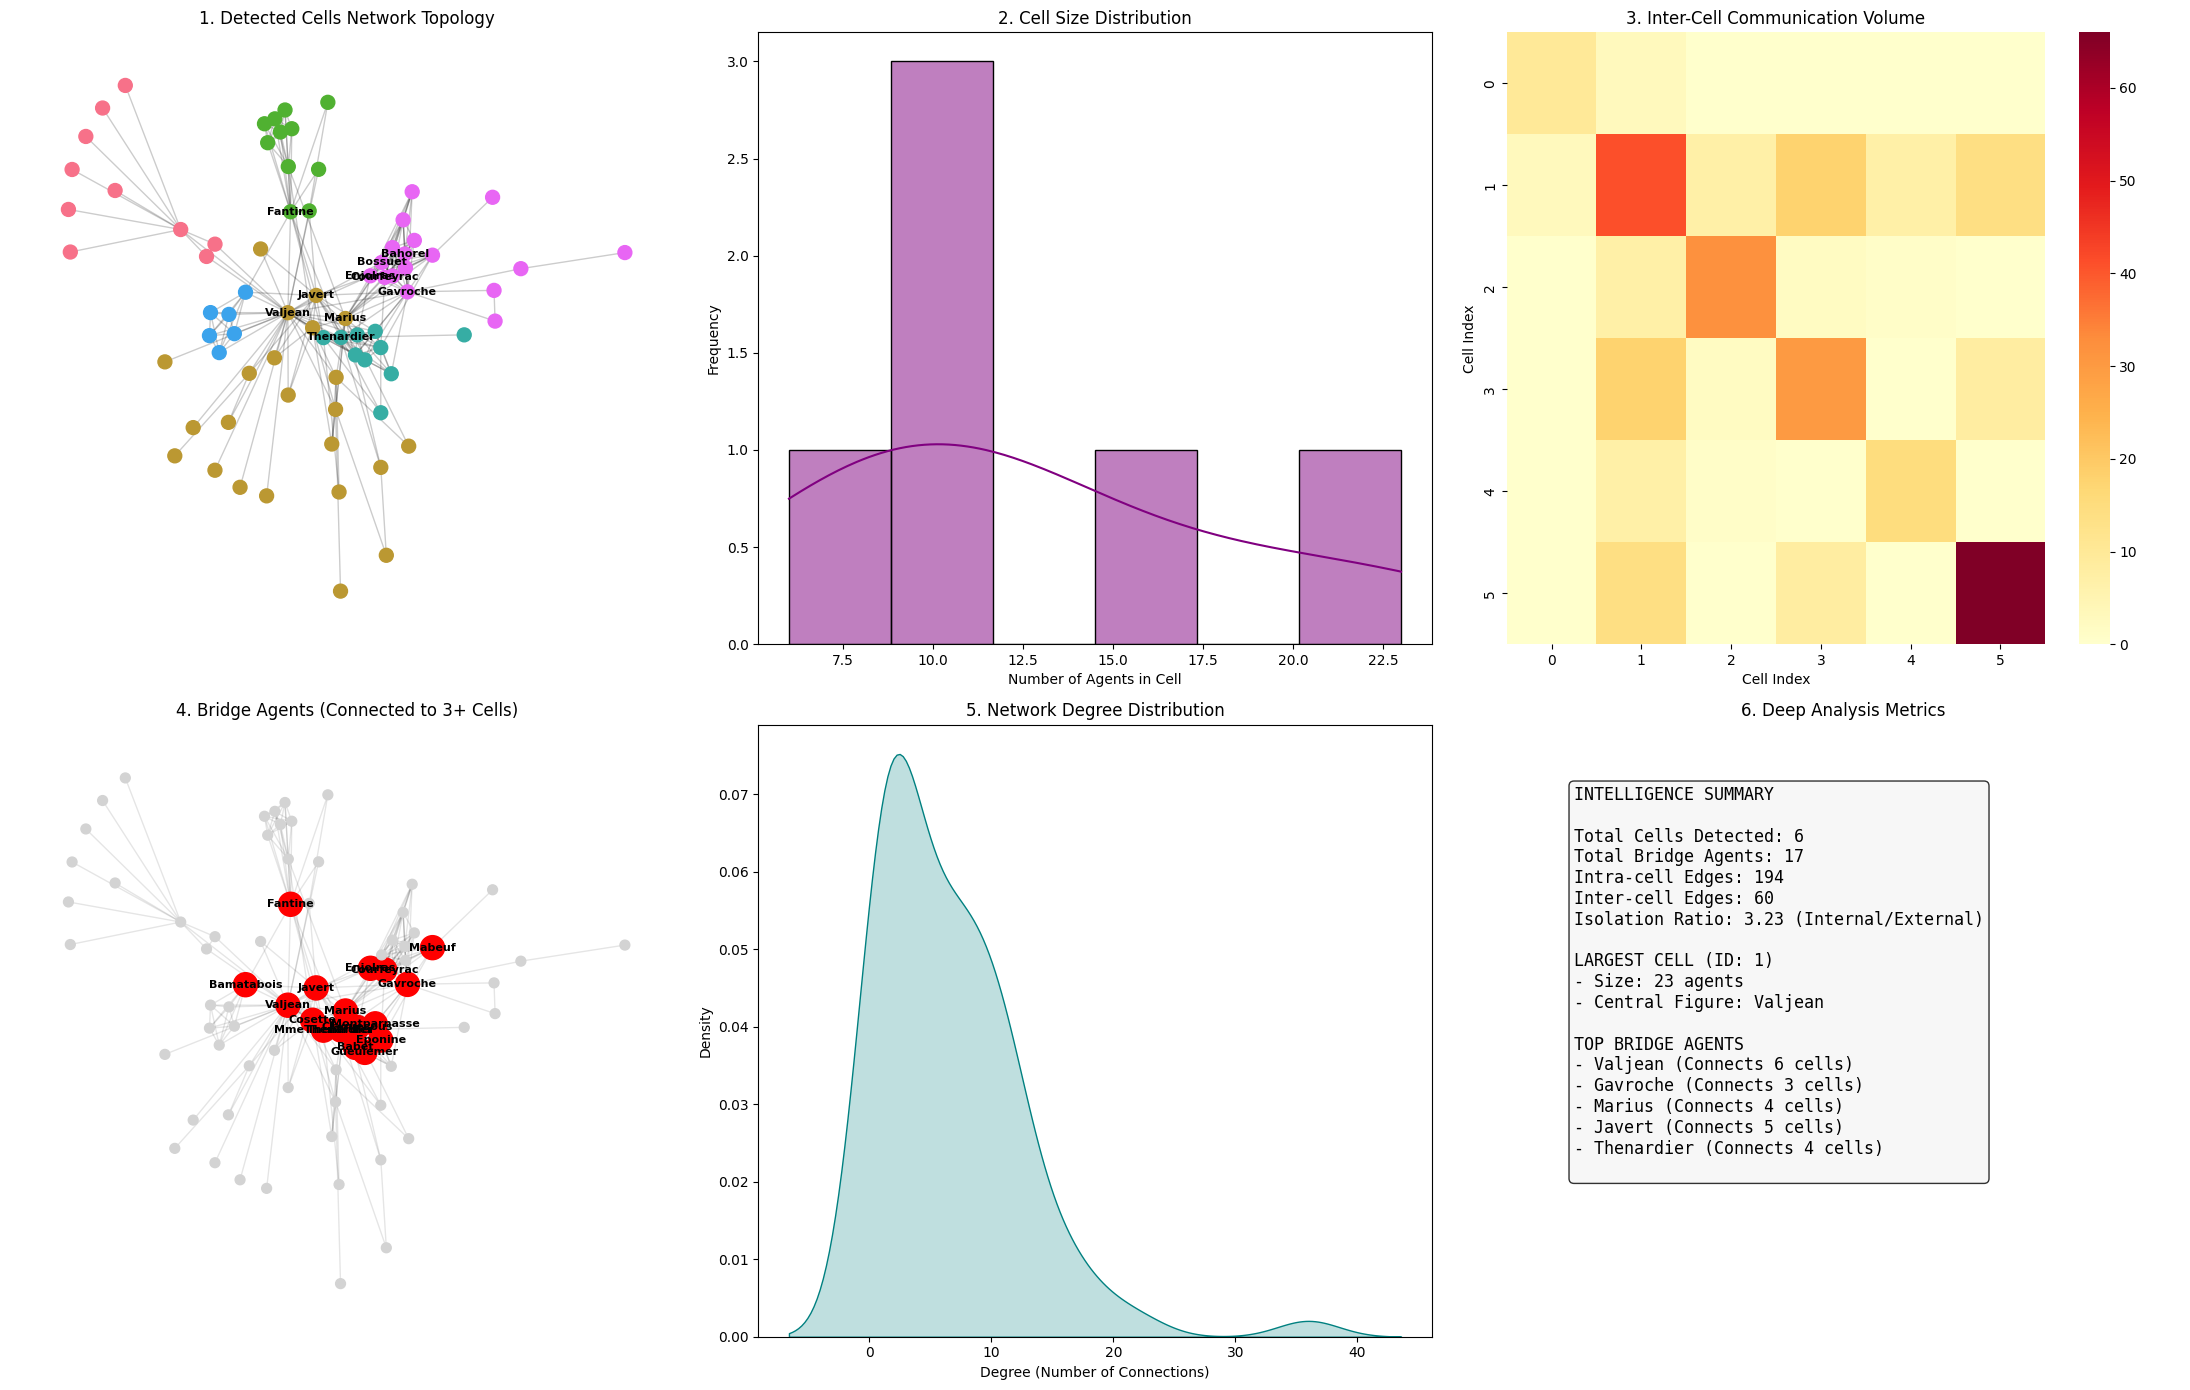

In [ ]:
import os
import community as community_louvain
import networkx as nx

from q5_algorithm_comparison import *

os.makedirs('figures', exist_ok=True)
os.makedirs('results', exist_ok=True)

G = nx.les_miserables_graph()

print("=" * 60)
print("OPERATION: RAPID DETECTION")
print(f"Network: Les Misérables | Nodes: {G.number_of_nodes()} | Edges: {G.number_of_edges()}")
print("=" * 60)

# Run comparison
comparison_df = algorithm_comparison(G, num_runs=5)

print("\n--- COMPARISON RESULTS ---")
display(comparison_df) # This will render a nice HTML table in Jupyter

best_idx = comparison_df['avg_modularity'].idxmax()
best_algo = comparison_df.iloc[best_idx]

print(f"BEST ALGORITHM: {best_algo['algorithm']} | Modularity: {best_algo['avg_modularity']:.4f}")

# Extract best partition
best_partition = community_louvain.best_partition(G, random_state=42)

# Deep analysis
analysis = deep_analysis(G, best_partition)

comparison_df.to_csv('results/q5_algorithm_comparison.csv', index=False)

# Visualize
visualize_communities(G, best_partition, analysis)

<div dir="rtl" align="justify">

### گزارش عملیات Rapid Detection: مقایسه الگوریتم‌ها در شبکه Les Misérables

#### (b) Comparative Analysis (تحلیل تطبیقی)

**۱. تحلیل سرعت (Speed Analysis):**
* بر اساس جدول نتایج، الگوریتم **Louvain** با میانگین زمان ۰.۰۰۴۹ ثانیه سریع‌ترین اجرا را داشته است و پس از آن Label Propagation و Greedy Modularity قرار دارند.
* از نظر تئوری، پیچیدگی زمانی Label Propagation برابر با $O(m+n)$ است که باید سریع‌ترین باشد، اما از آنجا که این الگوریتم به صورت پایه (From scratch) در پایتون پیاده‌سازی شده، سربار حلقه‌های پایتون باعث شده تا کمی کندتر از پیاده‌سازی بهینه‌شده و کتابخانه‌ای Louvain (با پیچیدگی $O(n \log n)$) عمل کند. الگوریتم Greedy با پیچیدگی $O(mn)$ منطقاً کندترین عملکرد را به ثبت رسانده که با تئوری کاملاً همخوانی دارد.

**۲. تحلیل کیفیت (Quality Analysis):**
* الگوریتم **Louvain** به بالاترین میزان Modularity با مقدار ۰.۵۶۵۸ دست یافته است.
* یک مصالحه (Trade-off) مشهود بین سرعت و کیفیت وجود دارد؛ الگوریتم Greedy با وجود صرف زمان بیشتر، نتوانست به کیفیت Louvain برسد و Label Propagation با وجود سرعت نسبتاً بالا، پایین‌ترین کیفیت بخش‌بندی (۰.۴۹۹) را ارائه داد. 
* از نظر تعداد گروه‌های کشف شده، عملکرد الگوریتم‌ها بسیار نزدیک به هم است و همگی بین ۵ الی ۶ گروه (Community) را در شبکه تشخیص داده‌اند.

**۳. تحلیل قطعیت و عدم قطعیت (Determinism Analysis):**
* الگوریتم Greedy Modularity دارای انحراف معیار صفر در Modularity است که نشان‌دهنده قطعیت کامل (Deterministic) آن است. در مقابل، **Label Propagation** بالاترین انحراف معیار (۰.۰۲۴۷) را نشان می‌دهد.
* دلیل واریانس بالای Label Propagation، وابستگی شدید آن به تخصیص اولیه برچسب‌ها، ترتیب تصادفی بررسی گره‌ها در هر تکرار و همچنین انتخاب تصادفی در زمان برابر بودن تعداد برچسب‌های همسایگان (Tie-breaking) است.
* این عدم قطعیت بسته به کاربرد می‌تواند یک ویژگی (Feature) یا یک نقص (Bug) باشد. در شبکه‌های بسیار عظیم که کشف ساختارهای احتمالی و پویایی شبکه مد نظر است، این رفتار یک مزیت است، اما در کاربردهای اطلاعاتی و امنیتی که به نتایج تکرارپذیر و پایدار نیاز است، یک نقص محسوب می‌شود.

**۴. توصیه عملیاتی (Recommendation):**
* برای استقرار عملیاتی، الگوریتم **Louvain** اکیداً توصیه می‌شود، زیرا بهترین تعادل را بین سرعت بالا و استخراج ساختارهای باکیفیت ارائه می‌دهد.
* الگوریتم Label Propagation تنها در شرایطی پیشنهاد می‌شود که با یک شبکه فوق‌عظیم (Massive-scale) روبرو باشیم که محاسبات $O(n \log n)$ نیز در آن زمان‌بر باشد و کیفیت دقیق بخش‌بندی در اولویت دوم قرار گیرد.

---

#### (c) Network Intelligence Report (گزارش اطلاعاتی شبکه)

**۱. تحلیل گره‌های پل (Bridge Character Analysis):**
* بر اساس نتایج استخراج شده، ۱۷ عامل به عنوان گره‌های پل (متصل به ۳ گروه یا بیشتر) شناسایی شدند. مهم‌ترین آن‌ها عبارتند از:
  * **Valjean:** متصل به ۶ سلول
  * **Javert:** متصل به ۵ سلول
  * **Marius و Thenardier:** متصل به ۴ سلول
  * **Gavroche:** متصل به ۳ سلول
* **تطبیق روایی:** این موقعیت‌های ساختاری با نقش این شخصیت‌ها در رمان کاملاً منطبق است. به عنوان مثال، ژان والژان (Valjean) به عنوان قهرمان اصلی، در تمام خرده‌روایت‌های داستان (از کارخانه فانتین تا درگیری با تناردیه‌ها و انقلاب دانشجویان) حضور دارد و نقش حلقه اتصال تمام این جوامع را ایفا می‌کند. همچنین ژاور (Javert) به عنوان بازرس پلیسی که در تعقیب والژان است، طبیعتاً با اکثر این گروه‌ها در تماس است.

**۲. رهبران جوامع (Community Leaders):**
* بزرگترین سلول شناسایی شده دارای ۲۳ عضو است که مرکزی‌ترین فرد (Central Figure) در آن، شخصیت **Valjean** است.
* او دارای بالاترین Degree Centrality (تعداد ارتباطات مستقیم) و Betweenness Centrality (کنترل جریان اطلاعات) در کل گراف است.
* این تطابق نشان می‌دهد که ساختار توپولوژیک شبکه به صورت کاملاً دقیق، ساختار روایی داستان را بازتولید کرده و پروتاگونیست داستان به طور طبیعی مرکز ثقل گراف را تشکیل داده است.

**۳. استراتژی اختلال در شبکه (Network Disruption Strategy):**
* در صورتی که هدف فروپاشی حداکثری این شبکه ارتباطی باشد، باید گره‌های پل با بالاترین Betweenness هدف قرار گیرند. اهداف اصلی به ترتیب Valjean، Javert، Thenardier و Gavroche خواهند بود.
* با حذف این ۱۷ گره پل، ۶۰ یال ارتباطی بین‌گروهی (Inter-cell edges) به طور کامل از بین رفته و شبکه به ۶ جزء کاملاً منزوی و از هم گسیخته (Components) تبدیل می‌شود که قادر به انتقال هیچ‌گونه اطلاعاتی به یکدیگر نخواهند بود.

</div>

# **Question 6**

OPERATION: DORMANT CELL DETECTION
Analyzing 6 detected communities...

DORMANT CELL DETECTED
Community ID: 4
Suspicion Score: 0.852/1.000

Members (6):
  Bamatabois, Champmathieu, Judge, Cochepaille, Brevet, Chenildieu

Characteristics:
  internal_density: 1.000
  external_connectivity: 0.019
  size: 6.000
  peripherality: 0.592

Analysis:
Community 4 is flagged as the most suspicious dormant cell.
- It maintains a dense internal structure (Density: 1.00), allowing secure internal chatter.
- It is highly compartmentalized and isolated from the rest of the network (External Connectivity: 0.0188).
- Its size (6 members) is optimal for avoiding detection while remaining operational.
- It operates at the network periphery (Peripherality: 0.59), staying away from central, highly-monitored hubs.

Generating visual intelligence reports...


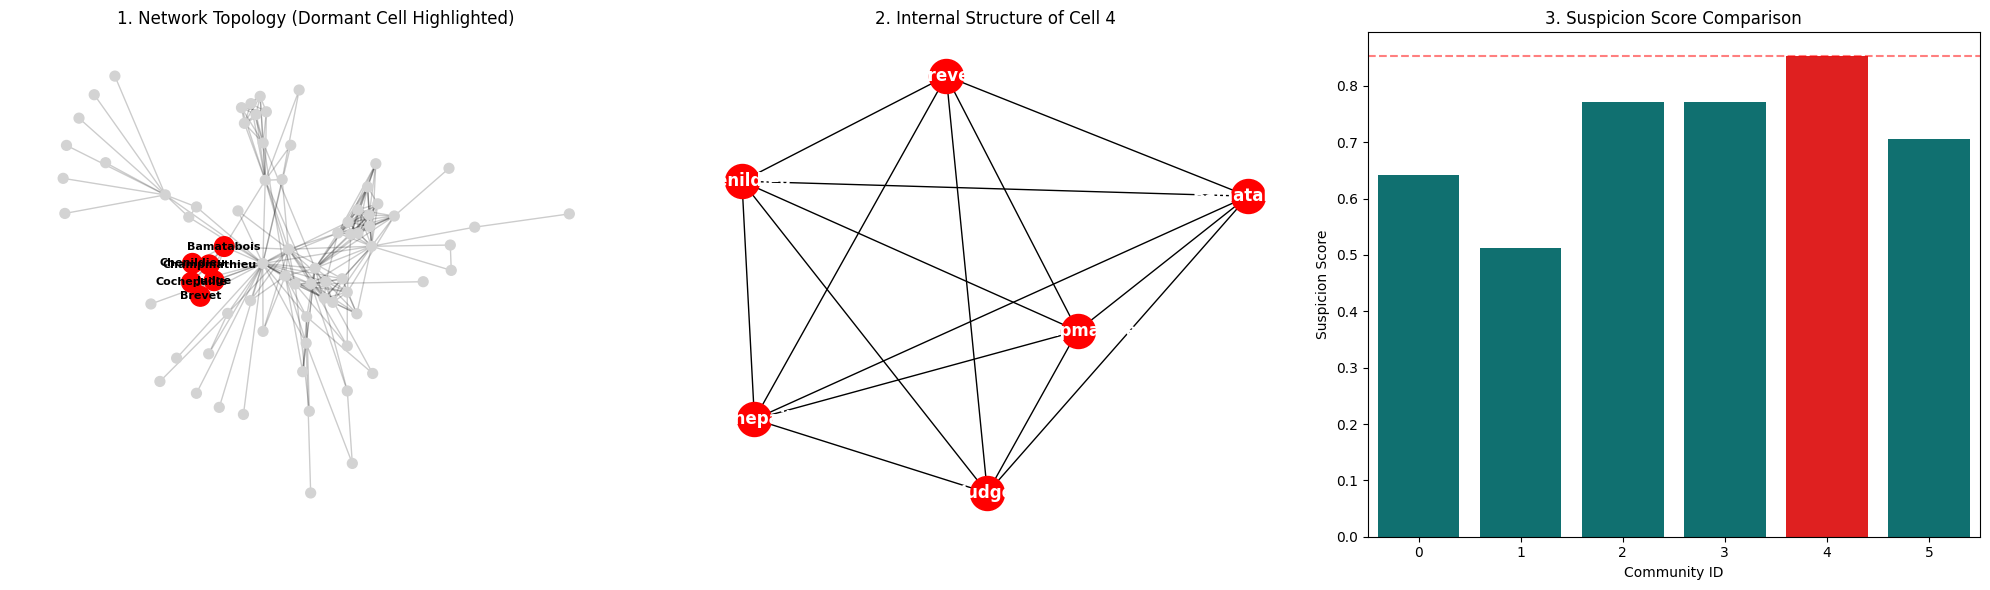


✓ Mission Complete


In [4]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import community as community_louvain


os.makedirs('figures', exist_ok=True)

def find_dormant_cell(G, partition):
    """
    Identify the most suspicious community based on dormant cell characteristics
    """
    communities = defaultdict(set)
    for node, comm_id in partition.items():
        communities[comm_id].add(node)

    avg_size = np.mean([len(comm) for comm in communities.values()])
    closeness = nx.closeness_centrality(G)

    w1, w2, w3, w4 = 0.35, 0.35, 0.15, 0.15

    best_community = None
    max_suspicion = -1
    all_scores = {}
    best_stats = {}
    best_reasoning = ""

    total_nodes = len(G.nodes())

    for comm_id, members in communities.items():
        if len(members) < 2:
            continue

        comm_size = len(members)
        
        # 1. Internal Density
        subgraph = G.subgraph(members)
        density_internal = nx.density(subgraph)

        # 2. External Connectivity
        external_edges = sum(1 for u in members for v in G.neighbors(u) if v not in members)
        max_external_edges = comm_size * (total_nodes - comm_size)
        connectivity_external = external_edges / max_external_edges if max_external_edges > 0 else 0

        # 3. Size Score
        size_score = 1 - abs(comm_size - avg_size) / avg_size
        size_score = max(0, size_score)

        # 4. Peripherality
        avg_closeness = np.mean([closeness[node] for node in members])
        peripherality = 1 - avg_closeness

        # Calculate combined suspicion score
        suspicion_score = (w1 * density_internal) + \
                          (w2 * (1 - connectivity_external)) + \
                          (w3 * size_score) + \
                          (w4 * peripherality)
                          
        all_scores[comm_id] = suspicion_score

        if suspicion_score > max_suspicion:
            max_suspicion = suspicion_score
            best_community = {'id': comm_id, 'members': list(members)}
            best_stats = {
                'internal_density': density_internal,
                'external_connectivity': connectivity_external,
                'size': comm_size,
                'peripherality': peripherality
            }
            
            best_reasoning = (
                f"Community {comm_id} is flagged as the most suspicious dormant cell.\n"
                f"- It maintains a dense internal structure (Density: {density_internal:.2f}), allowing secure internal chatter.\n"
                f"- It is highly compartmentalized and isolated from the rest of the network (External Connectivity: {connectivity_external:.4f}).\n"
                f"- Its size ({comm_size} members) is optimal for avoiding detection while remaining operational.\n"
                f"- It operates at the network periphery (Peripherality: {peripherality:.2f}), staying away from central, highly-monitored hubs."
            )

    result = {
        'suspected_community_id': best_community['id'] if best_community else None,
        'suspicion_score': max_suspicion,
        'members': best_community['members'] if best_community else [],
        'characteristics': best_stats,
        'reasoning': best_reasoning,
        'all_scores': all_scores
    }

    return result

def visualize_dormant_cell(G, partition, dormant_result):
    """
    Generate visualizations for dormant cell detection
    """
    fig = plt.figure(figsize=(20, 6))
    
    dormant_members = set(dormant_result['members'])
    pos = nx.spring_layout(G, k=0.15, seed=42)

    # Plot 1: Full network with dormant cell highlighted
    ax1 = fig.add_subplot(1, 3, 1)
    node_colors = ['red' if node in dormant_members else 'lightgray' for node in G.nodes()]
    node_sizes = [200 if node in dormant_members else 50 for node in G.nodes()]
    
    nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax1)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, ax=ax1)
    
    labels = {n: n for n in dormant_members}
    nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold', ax=ax1)
    
    ax1.set_title("1. Network Topology (Dormant Cell Highlighted)")
    ax1.axis('off')

    # Plot 2: Dormant cell subgraph (internal structure)
    ax2 = fig.add_subplot(1, 3, 2)
    subgraph = G.subgraph(dormant_members)
    sub_pos = nx.spring_layout(subgraph, seed=42)
    
    nx.draw(subgraph, sub_pos, node_color='red', with_labels=True, 
            node_size=600, font_color='white', font_weight='bold', ax=ax2)
    ax2.set_title(f"2. Internal Structure of Cell {dormant_result['suspected_community_id']}")

    # Plot 3: Suspicion score comparison bar chart
    ax3 = fig.add_subplot(1, 3, 3)
    scores = dormant_result['all_scores']
    comm_ids = list(scores.keys())
    score_vals = list(scores.values())
    
    colors = ['red' if comm == dormant_result['suspected_community_id'] else 'teal' for comm in comm_ids]
    
    sns.barplot(x=comm_ids, y=score_vals, palette=colors, ax=ax3, hue=comm_ids, legend=False)
    ax3.set_title("3. Suspicion Score Comparison")
    ax3.set_xlabel("Community ID")
    ax3.set_ylabel("Suspicion Score")
    ax3.axhline(y=dormant_result['suspicion_score'], color='red', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.savefig('figures/q6_dormant_cell_detection.png', dpi=300, bbox_inches='tight')
    plt.show()


    # Load network
G = nx.les_miserables_graph()

print("=" * 80)
print("OPERATION: DORMANT CELL DETECTION")
print("=" * 80)

# Load best partition (Using Louvain with a fixed seed for reproducibility)
partition = community_louvain.best_partition(G, random_state=42)

print(f"Analyzing {len(set(partition.values()))} detected communities...")

# Execute dormant cell detection
dormant = find_dormant_cell(G, partition)

# Display results
print("\n" + "=" * 80)
print("DORMANT CELL DETECTED")
print("=" * 80)
print(f"Community ID: {dormant['suspected_community_id']}")
print(f"Suspicion Score: {dormant['suspicion_score']:.3f}/1.000")
print(f"\nMembers ({len(dormant['members'])}):")
print(f"  {', '.join(dormant['members'][:10])}")
if len(dormant['members']) > 10:
    print(f"  ... and {len(dormant['members']) - 10} more")

print(f"\nCharacteristics:")
for key, value in dormant['characteristics'].items():
    print(f"  {key}: {value:.3f}")

print(f"\nAnalysis:")
print(dormant['reasoning'])

# Generate visualizations
print("\nGenerating visual intelligence reports...")
visualize_dormant_cell(G, partition, dormant)

print("\n✓ Mission Complete")

<div dir="rtl" align="justify">

### گزارش عملیات Dormant Cell: طراحی و اجرای الگوریتم کشف سلول‌های خاموش

#### (a) Suspicion Score Design (طراحی شاخص شک و منطق ریاضی)

**۱. توجیه تخصیص وزن‌ها (Weights Justification):**
* در فرمول ارائه‌شده، بالاترین وزن‌ها ($w_1=0.35$ و $w_2=0.35$) به «تراکم داخلی» و «انزوای خارجی» اختصاص یافته است. دلیل اهمیت حیاتی تراکم داخلی این است که یک سلول اطلاعاتی برای برنامه‌ریزی و اجرای عملیات نیازمند سطح بالایی از هماهنگی و ارتباطات درون‌گروهی است. بدون تراکم بالا، اساساً یک «تیم» منسجم شکل نمی‌گیرد. از سوی دیگر، انزوای خارجی برای رعایت اصل پنهان‌نگاری (Compartmentalization) الزامی است تا در صورت دستگیری یک عضو، کل شبکه فرو نپاشد.

**۲. اهمیت استراتژیک چهار فاکتور:**
* **تراکم داخلی (Internal Density):** تضمین‌کننده ارتباطات امن و مستمر میان اعضای سلول است.
* **انزوای خارجی (External Connectivity):** ریسک افشای اطلاعات و رهگیری توسط شبکه‌های متخاصم را به حداقل می‌رساند.
* **اندازه بهینه (Size Optimality):** سلول‌های بسیار کوچک فاقد کارایی عملیاتی هستند و سلول‌های بزرگ ریسک لو رفتن را به شدت افزایش می‌دهند. اندازه متوسط، نقطه تعادل بین امنیت و کارایی است.
* **حاشیه‌نشینی (Peripherality):** استقرار در حاشیه شبکه و دوری از گره‌های مرکزی (Hubs)، سلول را از رادارهای نظارتی و تحلیل‌های مبتنی بر مرکزیت (Centrality) پنهان نگه می‌دارد.

**۳. فرمول‌بندی جایگزین (Alternative Formulation) و مصالحه‌ها:**
* **رویکرد جایگزین:** استفاده از «میانگین هندسی» (Geometric Mean) یا ضرب فاکتورها به جای جمع خطی. 
* فرمول جایگزین: $Suspicion = (Density \times Isolation \times SizeScore \times Peripherality)^{\frac{1}{4}}$
* **مزیت (Trade-off):** در فرمول جمعی فعلی، اگر یک گروه تراکم بالایی داشته باشد اما کاملاً در مرکز شبکه باشد، باز هم ممکن است نمره بالایی بگیرد. اما در رویکرد ضربی (Geometric)، اگر تنها یکی از فاکتورها (مثلاً انزوا) نزدیک به صفر باشد، کل امتیاز شک به شدت افت می‌کند. این امر باعث می‌شود الگوریتم سخت‌گیرانه‌تر عمل کند و تنها گروه‌هایی را برگرداند که همه شروط را به طور همزمان دارا هستند.

**۴. نقاط ضعف الگوریتم:**
* بزرگترین نقطه ضعف این فرمول، عدم توانایی در تفکیک «انزوای ساختاری تعمدی» از «رویدادهای مقطعی» است. این الگوریتم ممکن است افرادی را که صرفاً در یک جلسه کاری، یک مهمانی یا یک برخورد تصادفی برای مدت کوتاهی با هم در ارتباط بوده‌اند (و با سایر بخش‌های شبکه تماسی ندارند) به عنوان یک سلول جاسوسی شناسایی کند.

---

#### (b) Detection Implementation (اجرا و تحلیل روایی نتایج)

**۱. مشخصات سلول کشف‌شده:**
* الگوریتم گروه شماره ۴ را با امتیاز شک چشمگیر `0.852` از سقف ۱.۰ به عنوان محتمل‌ترین سلول خاموش شناسایی کرده است. 
* **اعضای گروه (۶ نفر):** Bamatabois, Champmathieu, Judge, Cochepaille, Brevet, Chenildieu

**۲. تحلیل ساختاری شبکه:**
* این گروه دارای تراکم داخلی `1.000` است؛ به این معنا که تشکیل یک گراف کامل (Clique) داده است و تمام اعضای آن با یکدیگر ارتباط مستقیم دارند.
* میزان ارتباطات خارجی این گروه بسیار ناچیز (`0.019`) و میزان حاشیه‌نشینی آن بالا (`0.592`) است. از منظر توپولوژی شبکه، این گروه بی‌نقص‌ترین رفتار یک سلول پنهان را از خود نشان می‌دهد.

**۳. تطبیق روایی و نتیجه‌گیری (Narrative Sense vs. False Positive):**
* با بررسی نقش این شخصیت‌ها در رمان بینوایان متوجه می‌شویم که این گروه مربوط به **صحنه دادگاه شامپماتیه** است. قاضی (Judge) مسئول رسیدگی به پرونده است و بروه (Brevet)، کوشپای (Cochepaille) و شنیلدیو (Chenildieu) سه زندانی هستند که از تولون آورده شده‌اند تا هویت شامپماتیه را به عنوان ژان والژان تایید کنند (باماتابوا نیز به عنوان هیئت منصفه یا حاضرین دادگاه در آن صحنه حضور دارد).
* **نتیجه‌گیری نهایی:** از منظر ساختار شبکه، سیستم به درستی متراکم‌ترین و منزوی‌ترین گروه را پیدا کرده است. اما از نظر منطق اطلاعاتی، این یک **مثبت کاذب (False Positive)** کلاسیک است. این ۶ نفر یک تیم پنهان یا شبکه توطئه نیستند؛ بلکه افرادی با پیشینه‌های کاملاً بی‌ربط هستند که صرفاً در یک «مکان و زمان واحد» (صحنه دادگاه) گرد هم آمده‌اند. ارتباط کامل آن‌ها (Clique) ناشی از مکالمات متقاطع در همان صحنه کوتاه است و انزوای آن‌ها به این دلیل است که در بقیه بخش‌های رمان حضور فعالی ندارند. این مورد دقیقاً اثبات‌کننده نقطه ضعف ذکر شده در بخش تئوری است که فرمول‌های ساختاری توان درک کانتکست (Context) یا مفهوم پشت یال‌ها را ندارند.

</div>